In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Neural Network
---

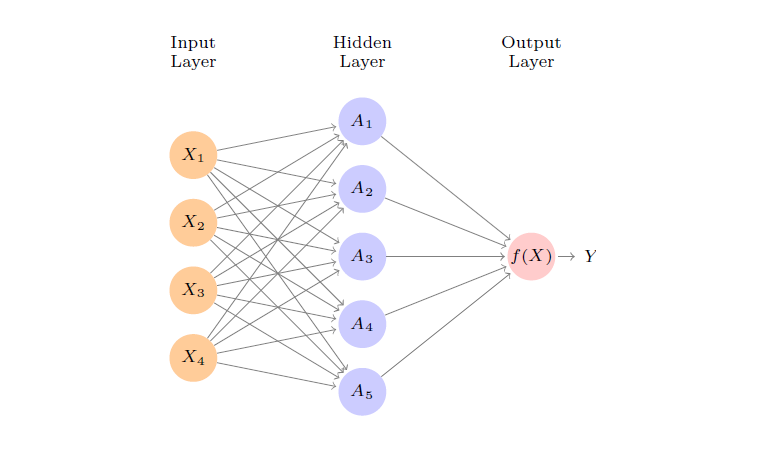

<center>
    <em>simple feed-forward neural network</em>
</center>

## Single Layer Neural Networks

A neural network takes an input vector of $p$ variables $X = (X_1, X_2, ..., X_p)$ and builds a nonlinear function $f(X)$ to predict the response $Y$. We have built nonlinear prediction models. What distinguishes neural networks from these methods is the particular structure of the model.

Above figure shows a *simple feed-forward neural network* for modeling a quantitative response using $p = 4$ predictors. In the terminology of neural networks, the four features $X_1, ..., X_4$ make up the units in the *input layer*. The arrows indicate that each of the inputs from the input layer feeds into each of the $K$ *hidden units* (we get to pick $K$; here we chose 5). The neural network model has the form:

$$
f(X) = \beta_0 + \sum_{k=1}^{K} \beta_k h_k(X)
= \beta_0 + \sum_{k=1}^{K} \beta_k g\left(w_{k0} + \sum_{j=1}^{p} w_{kj}X_j \right)
$$

<br>


It is built up here in two steps. First, the $K$ *activations* $A_k, k = 1, ..., K$ in the hidden layer are computed as functions of the input features $X_1, ..., X_p$:

$$
A_k = h_k(X) = g\left(w_{k0} + \sum_{j=1}^{p} w_{kj} X_j\right)
$$

---



## Activation Functions

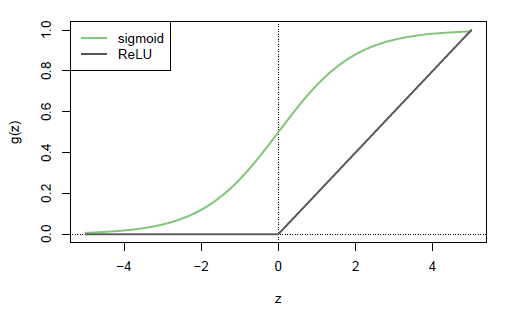

The function $g(z)$ is a nonlinear *activation function* that is specified in advance. We can think of each $A_k$ function as a different transformation $h_k(X)$ of the original features. These $K$ activations from the hidden layer then feed into the output layer, resulting in:

$$
f(X) = \beta_0 + \sum_{k=1}^{K} \beta_k A_k
$$


This is essentially a linear regression model in the $K = 5$ activations. All the parameters $\beta_0, ..., \beta_K$ and $w_{10}, ..., w_{Kp}$ need to be estimated from the data.

In the early instances of neural networks, the *sigmoid* activation function was favored:

$$
g(z) = \frac{e^z}{1 + e^z} = \frac{1}{1 + e^{-z}}
$$

<br>

This is the same function used in logistic regression to convert a linear function into probabilities between zero and one.

The preferred choice in modern neural networks is the ReLU (rectified linear unit) activation function, which takes the form:

$$
g(z) = \max(0, z) =
\begin{cases} 
0 & \text{if } z < 0 \\
z & \text{otherwise}
\end{cases}
$$


ReLU activations are more efficient to compute and store than sigmoid activations. Although ReLU thresholds at zero, the constant term $w_{k0}$ shifts the inflection point.

The name **neural network** originally derived from the analogy between hidden units and neurons in the brain. In this analogy, the activations $( A_k = h_k(X) )$ are akin to neurons firing. When the values of $( A_k )$ are close to one (using the sigmoid activation function), they are considered to be "firing," whereas values close to zero are "silent."


---

In [2]:
import numpy as np

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ReLU activation function
def relu(z):
    return np.maximum(0, z)


## Example: Nonlinear Transformations and Interactions

Consider a simple example with $p = 2$ input variables $X = (X_1, X_2)$, and $K = 2$ hidden units $h_1(X)$ and $h_2(X)$, with $g(z) = z^2$. We specify the parameters as follows:

$$
\beta_0 = 0, \beta_1 = \frac{1}{4}, \beta_2 = -\frac{1}{4},
$$
$$
w_{10} = 0, w_{11} = 1, w_{12} = 1,
$$
$$
w_{20} = 0, w_{21} = 1, w_{22} = -1.
$$


Following $ h_k(X) $:

$$
h_1(X) = (0 + X_1 + X_2)^2,
$$
$$
h_2(X) = (0 + X_1 - X_2)^2.
$$

This into $f(X)$, we get:

$$
f(X) = 0 + \frac{1}{4} \cdot (0 + X_1 + X_2)^2 - \frac{1}{4} \cdot (0 + X_1 - X_2)^2
= \frac{1}{4} \left[ (X_1 + X_2)^2 - (X_1 - X_2)^2 \right]
= X_1 X_2.
$$

This shows that the sum of two nonlinear transformations of linear functions can give us an interaction!

---

In [3]:
import numpy as np

# Define the input variables X1 and X2
X1 = np.array([1.0, 2.0, 3.0])  # Example values for X1
X2 = np.array([4.0, 5.0, 6.0])  # Example values for X2

# Parameters as given in the example
beta_0 = 0
beta_1 = 1/4
beta_2 = -1/4

# Weights for hidden units
w10, w11, w12 = 0, 1, 1  # For h1(X)
w20, w21, w22 = 0, 1, -1  # For h2(X)

# Activation function g(z) = z^2
def g(z):
    return z**2

# Compute the activations for the two hidden units
h1_X = g(w10 + w11 * X1 + w12 * X2)  # h1(X) = (0 + X1 + X2)^2
h2_X = g(w20 + w21 * X1 + w22 * X2)  # h2(X) = (0 + X1 - X2)^2

# Compute the final output f(X)
f_X = beta_0 + beta_1 * h1_X + beta_2 * h2_X

# Display the results
print("h1(X):", h1_X)
print("h2(X):", h2_X)
print("f(X):", f_X)


h1(X): [25. 49. 81.]
h2(X): [9. 9. 9.]
f(X): [ 4. 10. 18.]


## Initialization and Forward Propagation

### 1. **Initialize Parameters**

The function `initialize_parameters` sets up the initial weights and biases for a neural network with a single hidden layer. Weights are initialized randomly, and biases are initialized to zeros.

- **W1**: Weight matrix for the input layer to the hidden layer, with dimensions
- **b1**: Bias vector for the hidden layer, with dimensions
- **W2**: Weight matrix for the hidden layer to the output layer, with dimensions.
- **b2**: Bias vector for the output layer, with dimensions

In [4]:
# Initialize parameters (weights and biases) for a single hidden layer neural network
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights for input to hidden layer
    b1 = np.zeros((hidden_size, 1))                       # Bias for hidden layer
    W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights for hidden to output layer
    b2 = np.zeros((output_size, 1))                       # Bias for output layer
    return W1, b1, W2, b2

### 2. **Forward Propagation**

The `forward_propagation` function computes the output of the neural network given an input matrix $X$, weights, and biases. It supports two types of activation functions: **ReLU** and **Sigmoid**.

- **$Z_1 = W_1^T X + b_1$**: This step computes the linear combination of inputs, weights, and biases for the hidden layer.
- **$A_1$**: The activation function is applied to $Z_1$. If `activation='relu'`, the ReLU function is used. If `activation='sigmoid'`, the Sigmoid function is used.
- **$Z_2 = W_2^T A_1 + b_2$**: The linear combination of the hidden layer activations $A_1$, weights, and biases for the output layer is computed.

In [5]:
# Forward propagation step for single layer neural network
def forward_propagation(X, W1, b1, W2, b2, activation='relu'):
    Z1 = np.dot(W1.T, X) + b1  # Linear transformation for hidden layer (W1 is input_size x hidden_size, hence we transpose it)
    if activation == 'relu':
        A1 = relu(Z1)  # Apply ReLU activation function
    elif activation == 'sigmoid':
        A1 = sigmoid(Z1)  # Apply Sigmoid activation function
    Z2 = np.dot(W2.T, A1) + b2  # Linear transformation for output layer (W2 is hidden_size x output_size, hence we transpose it)
    return Z2, A1

In [6]:
# Example for demonstration
input_size = 4
hidden_size = 5
output_size = 1

# Sample input data (4 features, 3 samples)
X = np.random.randn(input_size, 3)

# Initialize parameters
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

# Forward propagation with ReLU activation
output, hidden_activations = forward_propagation(X, W1, b1, W2, b2, activation='relu')
print("NumPy Output (ReLU):", output)

# Forward propagation with Sigmoid activation
output_sigmoid, hidden_activations_sigmoid = forward_propagation(X, W1, b1, W2, b2, activation='sigmoid')
print("NumPy Output (Sigmoid):", output_sigmoid)


NumPy Output (ReLU): [[-0.0006073  -0.00010528 -0.00045015]]
NumPy Output (Sigmoid): [[-0.00344527 -0.00322241 -0.00342116]]


## with Pytorch

In [7]:
#!pip install torch

### 1. Define the Neural Network Model

The class `SimpleNeuralNetwork` is defined as a subclass of `nn.Module`, which is the base class for all neural network modules in PyTorch. The model is initialized with the following parameters:

- **input_size**: The number of input features (4 in this case).
- **hidden_size**: The number of neurons in the hidden layer (5 here).
- **output_size**: The number of neurons in the output layer (1 here).
- **activation**: The choice of activation function, either `'relu'` or `'sigmoid'`.

- **fc1**: A fully connected linear layer that transforms the input layer to the hidden layer, with weights of shape
- **fc2**: A fully connected linear layer that transforms the hidden layer to the output layer, with weights of shape


### 2. Activation Function

Depending on the activation parameter, either **ReLU** or **Sigmoid** is selected and applied to the hidden layer outputs:

- **ReLU**: Rectified Linear Unit, which outputs 0 for negative inputs and keeps positive inputs unchanged.
- **Sigmoid**: Sigmoid function, which maps inputs to a range between 0 and 1.

### 3. Forward Propagation

The `forward` method defines how data flows through the network:

- **First Layer**: The input data is passed through the first fully connected layer (`fc1`) to compute the linear transformation.
- **Activation Function**: The activation function (ReLU or Sigmoid) is applied to the result from the first layer.
- **Second Layer**: The result is passed through the second fully connected layer (`fc2`) to compute the final output.

---



**PyTorch**: The `nn.Linear` layer expects input in the format `(batch_size, input_size)`, so the dataset is transposed using `X.T` to match this format.


In [8]:
import torch
import torch.nn as nn

In [9]:
X.shape

(4, 3)

In [10]:
# Sample input data 
X_torch = torch.tensor(X.T, dtype=torch.float32)
X_torch.shape

torch.Size([3, 4])

In [11]:
# Define the neural network model
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        super(SimpleNeuralNetwork, self).__init__()
        self.activation = activation
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, output_size) # Hidden to output layer
        
        if activation == 'relu':
            self.activation_function = nn.ReLU()
        elif activation == 'sigmoid':
            self.activation_function = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)                   # Linear transformation
        x = self.activation_function(x)   # Activation function
        x = self.fc2(x)                   # Output layer
        return x

# Parameters
input_size = 4
hidden_size = 5
output_size = 1

# Initialize model
model_relu = SimpleNeuralNetwork(input_size, hidden_size, output_size, activation='relu')
model_sigmoid = SimpleNeuralNetwork(input_size, hidden_size, output_size, activation='sigmoid')

# Forward propagation
output_relu = model_relu(X_torch)
output_sigmoid = model_sigmoid(X_torch)

print("Output from the network (ReLU):", output_relu.detach().numpy())
print("Output from the network (Sigmoid):", output_sigmoid.detach().numpy())


Output from the network (ReLU): [[-0.90866625]
 [-0.6588887 ]
 [-0.69631565]]
Output from the network (Sigmoid): [[0.4043856]
 [0.692365 ]
 [0.759593 ]]


Result from Pytorch and previous are different

In [12]:
# Forward propagation with ReLU activation
output, hidden_activations = forward_propagation(X, W1, b1, W2, b2, activation='relu')
print("NumPy Output (ReLU):", output)

# Forward propagation with Sigmoid activation
output_sigmoid, hidden_activations_sigmoid = forward_propagation(X, W1, b1, W2, b2, activation='sigmoid')
print("NumPy Output (Sigmoid):", output_sigmoid)

NumPy Output (ReLU): [[-0.0006073  -0.00010528 -0.00045015]]
NumPy Output (Sigmoid): [[-0.00344527 -0.00322241 -0.00342116]]


This is because the parameter initialization is different: if you make the initial parameter value the same, you will get the same result:

In [13]:
# Convert NumPy weights and biases to PyTorch tensors
W1_torch = torch.tensor(W1.T, dtype=torch.float32)  # Transpose W1 to match dimensions
b1_torch = torch.tensor(b1.flatten(), dtype=torch.float32)
W2_torch = torch.tensor(W2.T, dtype=torch.float32)
b2_torch = torch.tensor(b2.flatten(), dtype=torch.float32)

# Initialize model with ReLU activation
model_relu = SimpleNeuralNetwork(input_size, hidden_size, output_size, activation='relu')

# Manually set weights and biases to match NumPy
with torch.no_grad():
    model_relu.fc1.weight = torch.nn.Parameter(W1_torch)
    model_relu.fc1.bias = torch.nn.Parameter(b1_torch)
    model_relu.fc2.weight = torch.nn.Parameter(W2_torch)
    model_relu.fc2.bias = torch.nn.Parameter(b2_torch)

# Forward propagation
output_relu = model_relu(X_torch)

# Initialize model with Sigmoid activation
model_sigmoid = SimpleNeuralNetwork(input_size, hidden_size, output_size, activation='sigmoid')

# Manually set weights and biases to match NumPy
with torch.no_grad():
    model_sigmoid.fc1.weight = torch.nn.Parameter(W1_torch)
    model_sigmoid.fc1.bias = torch.nn.Parameter(b1_torch)
    model_sigmoid.fc2.weight = torch.nn.Parameter(W2_torch)
    model_sigmoid.fc2.bias = torch.nn.Parameter(b2_torch)

# Forward propagation
output_sigmoid = model_sigmoid(X_torch)

# Output results
print("Output from the network (ReLU):", output_relu.detach().numpy())
print("Output from the network (Sigmoid):", output_sigmoid.detach().numpy())

Output from the network (ReLU): [[-0.0006073 ]
 [-0.00010528]
 [-0.00045015]]
Output from the network (Sigmoid): [[-0.00344527]
 [-0.00322241]
 [-0.00342116]]


- **`with torch.no_grad():`**:

  This context disables gradient tracking for any operations performed inside. Since we are manually setting weights and biases rather than training the model, this ensures that unnecessary gradient computation is avoided, reducing memory usage.

<br>

- **`model_relu.fc1.weight = torch.nn.Parameter(W1_torch):`**

  This line manually sets the weights of the `fc1` layer to `W1_torch`, which is the NumPy weight matrix converted into a PyTorch tensor. By wrapping `W1_torch` with `torch.nn.Parameter`, it is registered as a trainable parameter in PyTorch.

<br>

- **`model_relu.fc1.bias = torch.nn.Parameter(b1_torch):`**

  This sets the bias of the `fc1` layer to `b1_torch`, also converted from a NumPy array to a PyTorch tensor, and registered as a trainable parameter.

<br>

- **`model_relu.fc2.weight = torch.nn.Parameter(W2_torch):`**

  This manually sets the weights of the `fc2` layer (hidden to output layer) to `W2_torch`.

<br>

- **`model_relu.fc2.bias = torch.nn.Parameter(b2_torch):`**

  This sets the bias of the `fc2` layer to `b2_torch`.

<br>

In [14]:
import tensorflow as tf

# Define the neural network model
class SimpleNeuralNetwork(tf.keras.Model):
    def __init__(self, hidden_size, activation='relu'):
        super(SimpleNeuralNetwork, self).__init__()
        self.activation = activation
        self.fc1 = tf.keras.layers.Dense(hidden_size, activation=activation)  # Input to hidden layer
        self.fc2 = tf.keras.layers.Dense(1)  # Hidden to output layer (linear activation)
    
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Parameters
input_size = 4
hidden_size = 5

# Sample input data (3 samples, 4 features)
X_tf = tf.random.normal((3, input_size))

# Initialize model
model_relu = SimpleNeuralNetwork(hidden_size, activation='relu')
model_sigmoid = SimpleNeuralNetwork(hidden_size, activation='sigmoid')

# Forward propagation
output_relu = model_relu(X_tf)
output_sigmoid = model_sigmoid(X_tf)

print("Output from the network (ReLU):", output_relu.numpy())
print("Output from the network (Sigmoid):", output_sigmoid.numpy())


Output from the network (ReLU): [[-0.00800319]
 [ 1.850045  ]
 [ 1.7544569 ]]
Output from the network (Sigmoid): [[-0.16078271]
 [ 0.33225864]
 [-0.2516111 ]]


## Fitting a Neural Network

### Key Concepts:
#### Model Parameters:
In the simple neural network model, the parameters include:
- $ \theta = (\theta_0, \theta_1, \dots, \theta_K) $
- $ w_k = (w_{k0}, w_{k1}, \dots, w_{kp}) $ for each $ k = 1, \dots, K $

#### Objective Function:
The goal is to minimize the following nonlinear least squares objective function:
$$
\text{minimize}_{\{w_k\}} \frac{1}{2} \sum_{i=1}^n (y_i - f(x_i))^2
$$
where:
$$
f(x_i) = \theta_0 + \sum_{k=1}^K \theta_k g\left( w_{k0} + \sum_{j=1}^p w_{kj} x_{ij} \right)
$$
This function appears simple but is challenging due to the nested arrangement of parameters and **nonconvexity**. Nonconvexity implies multiple possible solutions, including local and global minima.

#### Nonconvexity:

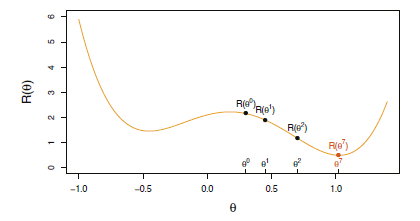

Figure shows a simple nonconvex function where there are two minima: one is a local minimum, and the other is a global minimum. This illustrates the challenges in optimization, as gradient descent could get stuck in a local minimum.



### Strategies to Fit Neural Networks:
- **Slow Learning (Gradient Descent)**: Neural networks are fitted iteratively using **gradient descent**, a method where parameters are updated step-by-step in the direction of the negative gradient. The fitting process is stopped when overfitting is detected.
- **Regularization**: To prevent overfitting, regularization methods such as **lasso** or **ridge penalties** are applied to the parameters.

### Gradient Descent Process:
The idea of gradient descent is simple:
1. Start with an initial guess $ \theta_0 $ for all parameters and set $ t = 0 $.
2. Iterate through the steps of moving in the direction of the negative gradient until the model converges (i.e., the gradient becomes small, indicating a local or global minimum).

#### Gradient Descent Example:
In the above Figure, an example of a one-dimensional gradient descent is shown, where the objective function $ R(\theta) $ has two minima: one local and one global. Starting from an initial random value $ \theta_0 $, gradient descent moves downhill — against the gradient — until it reaches the global minimum in 7 steps.

---



## Backpropagation

Backpropagation is the process used to compute the gradients of the objective function with respect to the parameters in a neural network, allowing the model to update its weights in the correct direction to minimize the loss. This process uses the chain rule of differentiation to assign portions of the error to each parameter, making it an essential mechanism for training deep learning models using gradient descent.


### 1. Gradient of Objective Function $R(\theta)$
To minimize the objective function $R(\theta)$, we need to compute its gradient at the current parameter values $\theta_m$. The gradient, denoted as $\nabla R(\theta_m)$, is the vector of partial derivatives at that point:

$$
\nabla R(\theta_m) = \frac{\partial R(\theta)}{\partial \theta} \Bigg|_{\theta=\theta_m}
$$

This gradient tells us in which direction the function $R(\theta)$ increases most rapidly.

### 2. Gradient Descent Update Rule
In gradient descent, we update the parameters by moving them a small step in the opposite direction of the gradient (since we want to minimize $R(\theta)$). The update rule is:

$$
\theta_{m+1} = \theta_m - \eta \nabla R(\theta_m)
$$

Here, $\eta$ is the learning rate, which controls the step size.

### 3. Backpropagation for Neural Networks
Let's now see how to apply backpropagation for a neural network.

The network's objective is to minimize the residuals between the predicted outputs $\hat{y}_i$ and the true outputs $y_i$. The residual for each sample $i$ is:

$$
\text{minimize}_{\{w_k\}} \frac{1}{2} \sum_{i=1}^n (y_i - f(x_i))^2
$$

$$
R_i(\theta) = \frac{1}{2} \left( y_i - \hat{y}_i \right)^2
$$

### 4. Forward Propagation
During forward propagation, we compute the output of the model:

$$
\hat{y}_i = \beta_0 + \sum_{k=1}^K \beta_k g\left( w_{k0} + \sum_{j=1}^p w_{kj} x_{ij} \right)
$$

For simplicity, let:

$$
z_{ik} = w_{k0} + \sum_{j=1}^p w_{kj} x_{ij}
$$

Then:

$$
\hat{y}_i = \beta_0 + \sum_{k=1}^K \beta_k g(z_{ik})
$$

### 5. Partial Derivative w.r.t. $\beta_k$
To update $\beta_k$, we compute the derivative of the residual with respect to $\beta_k$:

$$
\frac{\partial R_i(\theta)}{\partial \beta_k} = - \left( y_i - \hat{y}_i \right) g(z_{ik})
$$

The term $\left( y_i - \hat{y}_i \right)$ is the residual, and a fraction of it is attributed to each hidden unit via the activation function $g(z_{ik})$.




### 6. Partial Derivative w.r.t. $w_{kj}$
Next, we compute the derivative of the residual with respect to the weights $w_{kj}$ connecting the input $x_{ij}$ to the hidden unit $k$:

$$
\frac{\partial R_i(\theta)}{\partial w_{kj}} = - \left( y_i - \hat{y}_i \right) \beta_k g'(z_{ik}) x_{ij}
$$

This derivative shows how the error propagates back from the output layer through the hidden units and to the input weights. The term $g'(z_{ik})$ is the derivative of the activation function, and the input feature $x_{ij}$ is multiplied by this value.

---

# Backpropagation in a Neural Network (NumPy Example)

## 1. Forward Propagation

Forward propagation is the process of passing the input data through the network to compute the output (predictions).

### 1.1 Hidden Layer Activation:
The hidden layer performs a linear transformation followed by an activation function. The linear transformation is calculated as:

$$
Z_1 = W_1^T X + b_1
$$

Where:
- $Z_1$: Pre-activation of the hidden layer.
- $W_1$: Weight matrix between the input layer and hidden layer.
- $X$: Input data matrix.
- $b_1$: Bias vector for the hidden layer.

After this, we apply the activation function $g(Z_1)$. If we use ReLU as the activation function, the output becomes:

$$
A_1 = g(Z_1) = \text{ReLU}(Z_1) = \max(0, Z_1)
$$

### 1.2 Output Layer Calculation:
The output layer computes the final prediction using the output from the hidden layer, weights $W_2$, and bias $b_2$:

$$
Z_2 = W_2^T A_1 + b_2
$$

The output layer typically uses the **sigmoid** activation function to produce probabilities:

$$
A_2 = \sigma(Z_2) = \frac{1}{1 + \exp(-Z_2)}
$$

Where $A_2$ is the predicted probability for each sample.

---

In [15]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# ReLU activation function and its derivative
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

# Initialize parameters (weights and biases) for a single hidden layer neural network
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights for input to hidden layer
    b1 = np.zeros((hidden_size, 1))                       # Bias for hidden layer
    W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights for hidden to output layer
    b2 = np.zeros((output_size, 1))                       # Bias for output layer
    return W1, b1, W2, b2

# Forward propagation step for single layer neural network
def forward_propagation(X, W1, b1, W2, b2, activation='relu'):
    Z1 = np.dot(W1.T, X) + b1  # Linear transformation for hidden layer
    if activation == 'relu':
        A1 = relu(Z1)  # Apply ReLU activation function
    elif activation == 'sigmoid':
        A1 = sigmoid(Z1)  # Apply Sigmoid activation function
    Z2 = np.dot(W2.T, A1) + b2  # Linear transformation for output layer
    A2 = sigmoid(Z2)  # Output layer uses sigmoid activation
    return Z1, A1, Z2, A2



## 2. Loss Function

The loss function measures the difference between the predicted values $A_2$ and the actual labels $Y$. For binary classification, we use the **binary cross-entropy** loss:

$$
\mathcal{L}(Y, A_2) = -\frac{1}{m} \sum_{i=1}^m \left( y_i \log(a_{2i}) + (1 - y_i) \log(1 - a_{2i}) \right)
$$

Where:
- $m$: Number of samples.
- $y_i$: True label for sample $i$.
- $a_{2i}$: Predicted probability for sample $i$.

This loss function penalizes incorrect predictions, and the goal is to minimize it.

---

In [16]:
# Compute the loss (binary cross-entropy)
def compute_loss(Y, A2):
    m = Y.shape[1]
    return -1/m * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))


## 3. Backpropagation

Backpropagation calculates the gradient of the loss function with respect to each parameter in the network using the chain rule. This gradient is then used to update the weights and biases.

### 3.1 Output Layer Gradients:
The error at the output layer (residual) is:

$$
\delta_2 = A_2 - Y
$$

From this, we compute the gradients for the weights $W_2$ and biases $b_2$:

$$
\frac{\partial \mathcal{L}}{\partial W_2} = \frac{1}{m} A_1 \delta_2^T
$$

$$
\frac{\partial \mathcal{L}}{\partial b_2} = \frac{1}{m} \sum_{i=1}^m \delta_2
$$
### 3.2 Hidden Layer Gradients:
To compute the gradients for the hidden layer, we first propagate the error backwards using the chain rule. The error at the hidden layer $\delta_1$ is:

$$
\delta_1 = (W_2 \delta_2) \odot g'(Z_1)
$$

This means that after multiplying $W_2$ and $\delta_2$, we perform element-wise multiplication (denoted by $\odot$) with the derivative of the activation function $g'(Z_1)$. Here, $g'(Z_1)$ is the derivative of the activation function. For ReLU, the derivative is:

$$
g'(Z_1) = \begin{cases}
1 & \text{if } Z_1 > 0 \\
0 & \text{if } Z_1 \leq 0
\end{cases}
$$

Finally, we compute the gradients for the weights $W_1$ and biases $b_1$:

$$
\frac{\partial \mathcal{L}}{\partial W_1} = \frac{1}{m} X \delta_1^T
$$

$$
\frac{\partial \mathcal{L}}{\partial b_1} = \frac{1}{m} \sum_{i=1}^m \delta_1
$$

---

In this explanation:
- $\odot$ represents element-wise multiplication (Hadamard product).
- $g'(Z_1)$ is the derivative of the activation function applied to $Z_1$, which determines how much the pre-activation values affect the error backpropagation.



In [17]:
# Backpropagation to compute gradients
def backpropagation(X, Y, Z1, A1, Z2, A2, W1, W2, activation='relu'):
    m = X.shape[1]

    # Compute dZ2, dW2, and db2 (for output layer)
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(A1, dZ2.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    # Compute dZ1, dW1, and db1 (for hidden layer)
    if activation == 'relu':
        dA1 = np.dot(W2, dZ2)
        dZ1 = dA1 * relu_derivative(Z1)
    elif activation == 'sigmoid':
        dA1 = np.dot(W2, dZ2)
        dZ1 = dA1 * sigmoid_derivative(Z1)

    dW1 = (1/m) * np.dot(X, dZ1.T)  # No transpose on dW1
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

## 4. Parameter Updates

The gradients calculated in the backpropagation step are used to update the weights and biases using **gradient descent**. The update rule for gradient descent is:

$$
W_1 := W_1 - \eta \frac{\partial \mathcal{L}}{\partial W_1}
$$

$$
b_1 := b_1 - \eta \frac{\partial \mathcal{L}}{\partial b_1}
$$

$$
W_2 := W_2 - \eta \frac{\partial \mathcal{L}}{\partial W_2}
$$

$$
b_2 := b_2 - \eta \frac{\partial \mathcal{L}}{\partial b_2}
$$

Where $\eta$ is the learning rate, controlling the step size for weight updates.

---

In [18]:
# Update weights and biases using gradient descent
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1  # No transpose on W1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2  # No transpose on W2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

## Epoch

In machine learning, particularly in training neural networks, an **epoch** refers to one complete pass through the entire training dataset. During this pass, the model processes all training data and updates its weights accordingly based on the computed gradients from the loss function.

### Key Concepts Related to Epoch:

- **Epoch**: One epoch means that every training sample in the dataset has been used once to update the model's parameters (weights and biases).
  
- **Batch Size**: The number of training samples processed at once before the model’s weights are updated. If the batch size is smaller than the total number of training samples, multiple updates happen per epoch.

- **Iterations**: The number of batches needed to complete one epoch. If you have 10,000 training samples and a batch size of 100, then each epoch would consist of 100 iterations (10,000 / 100 = 100 iterations per epoch).

### Why Multiple Epochs?

- **Learning Patterns**: A model generally requires multiple epochs to learn patterns from the data. After one epoch, the model might not have learned enough from the data, especially for complex datasets. With each new epoch, the model’s weights are updated to reduce the loss function further and improve the model’s performance.
  
- **Overfitting Concern**: However, training a model for too many epochs can lead to **overfitting**, where the model performs well on training data but poorly on unseen data. Early stopping or regularization techniques are used to prevent this.

---

In [19]:
# Simple example for demonstration
input_size = 4
hidden_size = 5
output_size = 1
learning_rate = 0.1
epochs = 1000

# Sample input data (4 features, 3 samples)
X = np.random.randn(input_size, 3)
Y = np.array([[1, 0, 1]])  # Sample output (3 samples)

# Initialize parameters
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

# Training loop
for i in range(epochs):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2, activation='relu')

    # Compute loss
    loss = compute_loss(Y, A2)

    # Backpropagation
    dW1, db1, dW2, db2 = backpropagation(X, Y, Z1, A1, Z2, A2, W1, W2, activation='relu')

    # Update parameters
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    # Print the loss every 100 epochs
    if i % 100 == 0:
        print(f'Epoch {i}, Loss: {loss}')

# Final output after training
_, _, _, A2_final = forward_propagation(X, W1, b1, W2, b2, activation='relu')
print("Final output after training:", A2_final)

Epoch 0, Loss: 0.693187904604567
Epoch 100, Loss: 0.5938293168973072
Epoch 200, Loss: 0.1312521335581838
Epoch 300, Loss: 0.05328051747670746
Epoch 400, Loss: 0.02742654736298833
Epoch 500, Loss: 0.016543179402054676
Epoch 600, Loss: 0.011168597902197874
Epoch 700, Loss: 0.008144954420997552
Epoch 800, Loss: 0.006270033385580043
Epoch 900, Loss: 0.005020561049294698
Final output after training: [[0.99572284 0.0015127  0.99339868]]


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

# Sigmoid and ReLU activation functions are already provided by PyTorch
sigmoid = nn.Sigmoid()
relu = nn.ReLU()

# Define the neural network model using PyTorch
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        super(SimpleNeuralNetwork, self).__init__()
        
        # Linear transformations
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, output_size) # Hidden to output layer
        
        # Activation function choice
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        
        # Output layer activation is always sigmoid for binary classification
        self.output_activation = nn.Sigmoid()

    def forward(self, X):
        Z1 = self.fc1(X)                   # Linear transformation for hidden layer
        A1 = self.activation(Z1)           # Apply chosen activation function
        Z2 = self.fc2(A1)                  # Linear transformation for output layer
        A2 = self.output_activation(Z2)    # Apply sigmoid for output layer
        return A2

# Simple example for demonstration
input_size = 4
hidden_size = 5
output_size = 1
learning_rate = 0.1
epochs = 1000

model = SimpleNeuralNetwork(input_size, hidden_size, output_size, activation='relu')
loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Forward pass
X_torch = torch.tensor(X.T, dtype=torch.float32)

# Ensure Y is of shape (num_samples, 1)
Y_torch = torch.tensor(Y, dtype=torch.float32).view(-1, 1)  # Reshape to (num_samples, 1)

# Training loop
for epoch in range(epochs):
    # Forward pass
    A2 = model(X_torch)
    
    # Compute loss
    loss = loss_fn(A2, Y_torch)
    
    # Backpropagation
    optimizer.zero_grad()  # Zero the gradients before backward pass
    loss.backward()        # Perform backpropagation
    
    # Update parameters
    optimizer.step()       # Update weights
    
    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Final output after training
A2_final = model(X_torch)
print("Final output after training:", A2_final.detach().numpy())

Epoch 0, Loss: 0.7714051604270935
Epoch 100, Loss: 0.2846185863018036
Epoch 200, Loss: 0.1267954558134079
Epoch 300, Loss: 0.07305749505758286
Epoch 400, Loss: 0.04940054938197136
Epoch 500, Loss: 0.03671843931078911
Epoch 600, Loss: 0.028978869318962097
Epoch 700, Loss: 0.023821374401450157
Epoch 800, Loss: 0.020162595435976982
Epoch 900, Loss: 0.017443394288420677
Final output after training: [[0.9982401 ]
 [0.04072493]
 [0.99729544]]



## Summary:

- **Forward Propagation** computes the output of the network given input data.
- **Loss Function** measures the difference between predicted outputs and true labels.
- **Backpropagation** computes the gradient of the loss with respect to the network parameters.
- **Parameter Update** adjusts the network weights and biases using gradient descent to minimize the loss.

This process is repeated over many epochs to train the model and find the optimal set of parameters.

# Detailed Explanation of Backpropagation Equations

## 1. Linear Transformation in Hidden Layer

We define the linear transformation at the hidden layer as:

$$
z_{ik} = w_{k0} + \sum_{j=1}^{p} w_{kj} x_{ij}
$$

Where:
- $z_{ik}$: Pre-activation value for node $k$ in the hidden layer.
- $w_{k0}$: Bias term for node $k$ in the hidden layer.
- $w_{kj}$: Weight between input $x_j$ and hidden node $k$.
- $x_{ij}$: Input feature $j$ for sample $i$.

This equation represents the linear transformation of the input data into the hidden layer.

---

## 2. Partial Derivative with Respect to $\beta_k$

Now, we calculate the partial derivative of the loss function $R_i(\theta)$ with respect to the output weight $\beta_k$. The loss function $R_i(\theta)$ is typically defined as the difference between the predicted output $\hat{y}_i$ and the true value $y_i$.

### Loss Function $R_i(\theta)$:
The loss function $R_i(\theta)$ for a single sample $i$ is defined as:

$$
R_i(\theta) = \frac{1}{2} \left( y_i - \hat{y}_i \right)^2
$$

Where the predicted output $\hat{y}_i$ is:

$$
\hat{y}_i = f(x_i) = \sum_{k=1}^{K} \beta_k g(z_{ik})
$$

We now compute the partial derivative of $R_i(\theta)$ with respect to $\beta_k$.

### Step 1: Partial derivative of $R_i(\theta)$ with respect to $f(x_i)$:
The first step is to compute the partial derivative of the loss function with respect to the predicted output $f(x_i)$:

$$
\frac{\partial R_i(\theta)}{\partial f(x_i)} = -(y_i - f(x_i))
$$

This represents the residual between the true value and the predicted output.

### Step 2: Partial derivative of $f(x_i)$ with respect to $\beta_k$:
Next, we calculate the partial derivative of the predicted output with respect to the weight $\beta_k$:

$$
\frac{\partial f(x_i)}{\partial \beta_k} = g(z_{ik})
$$

Where $g(z_{ik})$ is the activation function for the hidden layer.

### Final Result:
Combining these results, the partial derivative of the loss function with respect to $\beta_k$ is:

$$
\frac{\partial R_i(\theta)}{\partial \beta_k} = -(y_i - f(x_i)) \cdot g(z_{ik})
$$

This equation shows that the error from the output layer is backpropagated to the weight $\beta_k$, with the hidden layer activation $g(z_{ik})$ determining the contribution.

---

## 3. Partial Derivative with Respect to $w_{kj}$

Next, we compute the partial derivative of the loss function with respect to the hidden layer weights $w_{kj}$. This is a crucial step in backpropagation as it shows how the error is propagated back from the output to the input layer.

### Step 1: Partial derivative of $R_i(\theta)$ with respect to $f(x_i)$:
The first step remains the same as in the previous calculation:

$$
\frac{\partial R_i(\theta)}{\partial f(x_i)} = -(y_i - f(x_i))
$$

### Step 2: Partial derivative of $f(x_i)$ with respect to $g(z_{ik})$:
The predicted output $f(x_i)$ depends on the hidden layer activation $g(z_{ik})$, so we compute its derivative:

$$
\frac{\partial f(x_i)}{\partial g(z_{ik})} = \beta_k
$$

This reflects how much the output depends on the weight $\beta_k$.

### Step 3: Partial derivative of $g(z_{ik})$ with respect to $z_{ik}$:
The next step is to compute the derivative of the activation function $g(z_{ik})$ with respect to the pre-activation $z_{ik}$:

$$
\frac{\partial g(z_{ik})}{\partial z_{ik}} = g'(z_{ik})
$$

Where $g'(z_{ik})$ is the derivative of the activation function. For example, if $g(z_{ik})$ is a sigmoid function, then:

$$
g'(z_{ik}) = g(z_{ik})(1 - g(z_{ik}))
$$

### Step 4: Partial derivative of $z_{ik}$ with respect to $w_{kj}$:
Finally, we compute the derivative of the linear transformation $z_{ik}$ with respect to the weight $w_{kj}$:

$$
\frac{\partial z_{ik}}{\partial w_{kj}} = x_{ij}
$$

This indicates how much the pre-activation $z_{ik}$ depends on the input $x_{ij}$.

### Final Result:
Combining all the partial derivatives, we get the final expression for the gradient with respect to the weight $w_{kj}$:

$$
\frac{\partial R_i(\theta)}{\partial w_{kj}} = -(y_i - f(x_i)) \cdot \beta_k \cdot g'(z_{ik}) \cdot x_{ij}
$$

This shows how the input feature $x_{ij}$ influences the weight $w_{kj}$ through the hidden layer activation $g'(z_{ik})$ and the output layer weight $\beta_k$.

---



# Word2Vec without Gensim

In [21]:
data = pd.read_csv('Data/bbc.csv')
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

def tokenizer(corpus) :
    processed_corpus = []
    for sentence in corpus:
        # Convert to lowercase
        sentence = sentence.lower()
        
        # Remove punctuation and non-alphabetic characters
        sentence = re.sub(r'[^a-z\s]', '', sentence)
        
        # Tokenize (split the sentence into words)
        words = sentence.split()
        
        processed_corpus.append([word for word in words if len(word)>=3])
    
    return processed_corpus

corpus = data[data['category']=='tech']['text']
tokenized_doc_pre = tokenizer(corpus)

In [23]:
from collections import defaultdict

# Count word frequencies
word_freq = defaultdict(int)
for sentence in tokenized_doc_pre:
    for word in sentence:
        word_freq[word] += 1
        
# Filter the vocabulary to include only words that appear more than 50 times
min_freq = 50
vocabulary = sorted([word for word, freq in word_freq.items() if freq >= min_freq])

tokenized_docs = []
for doc in tokenized_doc_pre:
    temp_list = [] 
    for word in doc:
        if word in vocabulary:
            temp_list.append(word)
    tokenized_docs.append(temp_list)

In [26]:
len(tokenized_docs), len(vocabulary)

(401, 487)

In [27]:
vocab_size = len(vocabulary)
word_to_index = {word: idx for idx, word in enumerate(vocabulary)}
index_to_word = {idx: word for idx, word in enumerate(vocabulary)}

# Function to one-hot encode words
def one_hot_vector(word_idx, vocab_size):
    vec = np.zeros(vocab_size)
    vec[word_idx] = 1
    return vec

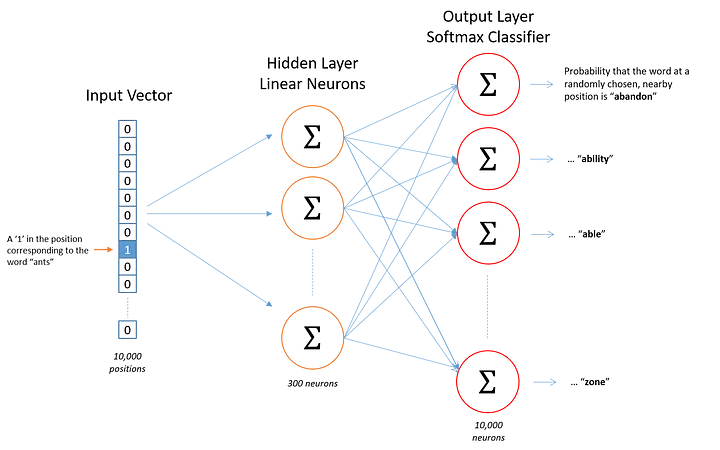

In [28]:
import numpy as np

class Word2Vec:
    def __init__(self, vocab_size, embedding_dim, learning_rate=0.01, epochs=100):
        self.vocab_size = vocab_size  # Size of the vocabulary
        self.embedding_dim = embedding_dim  # Number of dimensions for word embeddings
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.epochs = epochs  # Number of epochs to train
        self.W1 = np.random.uniform(-0.8, 0.8, (self.vocab_size, self.embedding_dim))  # Embedding matrix (input -> hidden)
        self.W2 = np.random.uniform(-0.8, 0.8, (self.embedding_dim, self.vocab_size))  # Output weight matrix (hidden -> output)

    # Softmax function to compute probabilities
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))  # Stability improvement
        return exp_x / exp_x.sum(axis=0)  # Normalize to get probabilities

    # Forward pass: from input to hidden to output
    def forward_pass(self, x):
        h = np.dot(self.W1.T, x)  # Compute the hidden layer (h = W1^T x)
        u_c = np.dot(self.W2.T, h)  # Compute raw scores for the output layer (u_c = W2^T h)
        y_c = self.softmax(u_c)  # Apply softmax to get probabilities
        return y_c, h, u_c

    # Backpropagation step to update weight matrices W1 and W2
    def backprop(self, e, h, x):
        # Compute gradients
        dl_dw2 = np.outer(h, e)  # Gradient for W2
        dl_dw1 = np.outer(x, np.dot(self.W2, e))  # Gradient for W1
        
        # Update weights
        self.W1 -= self.learning_rate * dl_dw1  # Update input -> hidden weights (W1)
        self.W2 -= self.learning_rate * dl_dw2  # Update hidden -> output weights (W2)

    # Cross Entropy Loss function
    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred + 1e-9))  # Adding a small value for numerical stability

    # Training the Word2Vec model
    def train(self, training_data):
        for epoch in range(self.epochs):
            total_loss = 0

            for context_words, target_word in training_data:
                # Context words are combined to a single vector (average of word embeddings)
                x = np.mean(context_words, axis=0)

                # Forward pass
                y_pred, h, u = self.forward_pass(x)

                # Calculate error (difference between predicted and target word distribution)
                error = y_pred - target_word  # Cross-entropy derivative

                # Backpropagation step
                self.backprop(error, h, x)

                # Compute loss using Cross Entropy
                loss = self.cross_entropy_loss(target_word, y_pred)
                total_loss += loss

            print(f'Epoch: {epoch+1}, Loss: {total_loss}')

    # Predict the output word probabilities given an input word
    def predict(self, x):
        y_pred, _, _ = self.forward_pass(x)
        return y_pred


In [29]:
# Create training data (context, target)
training_data = []
window_size = 5

for doc in tokenized_docs[0:100]:
    doc_idx = [word_to_index[word] for word in doc]
    for idx, target_idx in enumerate(doc_idx):
        # Context words (left and right within window size)
        context_idxs = [
            doc_idx[i] for i in range(max(0, idx - window_size), min(len(doc_idx), idx + window_size + 1)) 
            if i != idx
        ]
        context_words = np.array([one_hot_vector(i, len(vocabulary)) for i in context_idxs])
        target_word = one_hot_vector(target_idx, len(vocabulary))
        training_data.append((context_words, target_word))

# Display training data for illustration
for context, target in training_data[0:5]:
    print("Context Words:", [index_to_word[np.argmax(word)] for word in context], " -> Target Word:", index_to_word[np.argmax(target)])


Context Words: ['the', 'with', 'home', 'systems', 'highdefinition']  -> Target Word: future
Context Words: ['future', 'with', 'home', 'systems', 'highdefinition', 'and']  -> Target Word: the
Context Words: ['future', 'the', 'home', 'systems', 'highdefinition', 'and', 'digital']  -> Target Word: with
Context Words: ['future', 'the', 'with', 'systems', 'highdefinition', 'and', 'digital', 'video']  -> Target Word: home
Context Words: ['future', 'the', 'with', 'home', 'highdefinition', 'and', 'digital', 'video', 'into']  -> Target Word: systems


In [30]:
embedding_dim = 100  # Small embedding size for simplicity
model = Word2Vec(vocab_size=vocab_size, embedding_dim=embedding_dim, learning_rate=0.01, epochs=5)
# Train the model on the dataset
model.train(training_data)

Epoch: 1, Loss: 144069.92458767214
Epoch: 2, Loss: 135196.9384447001
Epoch: 3, Loss: 131569.64700801086
Epoch: 4, Loss: 129280.14281846595
Epoch: 5, Loss: 127536.32159055433
Epoch: 6, Loss: 126076.52814076595
Epoch: 7, Loss: 124791.25622222439
Epoch: 8, Loss: 123624.76626716072
Epoch: 9, Loss: 122544.86024286917
Epoch: 10, Loss: 121531.56621099195
Epoch: 11, Loss: 120571.80498900682
Epoch: 12, Loss: 119656.43674936607
Epoch: 13, Loss: 118778.7011094645
Epoch: 14, Loss: 117933.50371445257
Epoch: 15, Loss: 117117.02545144342
Epoch: 16, Loss: 116326.38865659037
Epoch: 17, Loss: 115559.35047277067
Epoch: 18, Loss: 114814.06426022171
Epoch: 19, Loss: 114088.92867691968
Epoch: 20, Loss: 113382.51022249667


In [ ]:
# Test prediction
input_word = 'future'
input_vector = one_hot_vector(word_to_index[input_word], vocab_size)

# Predict the probabilities for the context words
predicted_probs = model.predict(input_vector)

# Get the most likely context words based on prediction
predicted_word_idx = np.argmax(predicted_probs)
predicted_word = index_to_word[predicted_word_idx]

print(f"Predicted context word for '{input_word}': {predicted_word}")


In [ ]:
class Word2VecSkipGram:
    def __init__(self, vocab_size, embedding_dim, learning_rate=0.01, epochs=100):
        self.vocab_size = vocab_size  # Size of the vocabulary
        self.embedding_dim = embedding_dim  # Number of dimensions for word embeddings
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.epochs = epochs  # Number of epochs to train
        self.W1 = np.random.uniform(-0.8, 0.8, (self.vocab_size, self.embedding_dim))  # Embedding matrix (input -> hidden)
        self.W2 = np.random.uniform(-0.8, 0.8, (self.embedding_dim, self.vocab_size))  # Output weight matrix (hidden -> output)

    # Softmax function to compute probabilities
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x))  # Stability improvement
        return exp_x / exp_x.sum(axis=0)  # Normalize to get probabilities

    # Forward pass: from input to hidden to output
    def forward_pass(self, x):
        h = np.dot(self.W1.T, x)  # Compute the hidden layer (h = W1^T x)
        u_c = np.dot(self.W2.T, h)  # Compute raw scores for the output layer (u_c = W2^T h)
        y_c = self.softmax(u_c)  # Apply softmax to get probabilities
        return y_c, h, u_c

    # Backpropagation step to update weight matrices W1 and W2
    def backprop(self, e, h, x):
        # Compute gradients
        dl_dw2 = np.outer(h, e)  # Gradient for W2
        dl_dw1 = np.outer(x, np.dot(self.W2, e))  # Gradient for W1
        
        # Update weights
        self.W1 -= self.learning_rate * dl_dw1  # Update input -> hidden weights (W1)
        self.W2 -= self.learning_rate * dl_dw2  # Update hidden -> output weights (W2)

    # Cross Entropy Loss function
    def cross_entropy_loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred + 1e-9))  # Adding a small value for numerical stability

    # Training the Word2Vec model
    def train(self, training_data):
        for epoch in range(self.epochs):
            total_loss = 0

            for center_word, context_words in training_data:
                # One hot encode the center word (input)
                x = center_word

                # Forward pass
                y_pred, h, u = self.forward_pass(x)

                # Backpropagation step for each context word
                for context_word in context_words:
                    error = y_pred - context_word  # Cross-entropy derivative
                    self.backprop(error, h, x)

                    # Compute loss using Cross Entropy
                    loss = self.cross_entropy_loss(context_word, y_pred)
                    total_loss += loss

            print(f'Epoch: {epoch+1}, Loss: {total_loss}')

    # Predict the output word probabilities given an input word
    def predict(self, x):
        y_pred, _, _ = self.forward_pass(x)
        return y_pred


In [ ]:
# Create training data (center, context)
training_data = []
window_size = 5

for doc in tqdm(tokenized_docs):
    doc_idx = [word_to_index[word] for word in doc]
    for idx, center_idx in enumerate(doc_idx):
        # Context words (left and right within window size)
        context_idxs = [
            doc_idx[i] for i in range(max(0, idx - window_size), min(len(doc_idx), idx + window_size + 1)) 
            if i != idx
        ]
        center_word = one_hot_vector(center_idx, len(vocabulary))
        context_words = np.array([one_hot_vector(i, len(vocabulary)) for i in context_idxs])
        training_data.append((center_word, context_words))

# Display training data for illustration
for center, context in training_data[0:5]:
    print("Center Word:", index_to_word[np.argmax(center)], " -> Context Words:", [index_to_word[np.argmax(word)] for word in context])


In [ ]:
# Initialize Word2VecSkipGram model
embedding_dim = 100  # Small embedding size for simplicity
model = Word2VecSkipGram(vocab_size=vocab_size, embedding_dim=embedding_dim, learning_rate=0.01, epochs=5)

# Train the model on the dataset
model.train(training_data)

In [ ]:
# Test prediction
input_word = 'future'
input_vector = one_hot_vector(word_to_index[input_word], vocab_size)

# Predict the probabilities for the context words
predicted_probs = model.predict(input_vector)

# Get the most likely context word based on prediction
predicted_word_idx = np.argmax(predicted_probs)
predicted_word = index_to_word[predicted_word_idx]

print(f"Predicted context word for '{input_word}': {predicted_word}")